<table>
    <tr>
        <td style="text-align:left;"><div style="font-family: monospace; font-size: 2em; display: inline-block; width:60%">3. Variables</div><img src="images/roshan.png" style="width:30%; display: inline; text-align: left; float:right;"></td>
        <td></td>
    </tr>
</table>

So far all the tensors that we created were all constants where you can do operations that generate new tensors but you can never change the value of any tensor after creating it. To start doing "stateful" programming which keeps and updates values (or state) or tesnors you need to wrap your tensors in an instance of `ft.Varbiable()`.

As usaul before we start, let's import TensorFlow and start an interactive session.

In [1]:
import tensorflow as tf
import sys

print("Python Version:",sys.version.split(" ")[0])
print("TensorFlow Version:",tf.VERSION)

Python Version: 3.5.2
TensorFlow Version: 1.7.0


# Creating Variables

Let start a new interactive session and create some variables. To create a variables, your this function:

`tf.Variable(initial_value=None, trainable=True, collections=None, validate_shape=True, caching_device=None, name=None, variable_def=None, dtype=None, expected_shape=None, import_scope=None, constraint=None)`

In [2]:
sess = tf.InteractiveSession()

a = tf.Variable(tf.ones((2,2)), name="a")
a

<tf.Variable 'a:0' shape=(2, 2) dtype=float32_ref>

The first parameter that we passed to when creating an instanse of `tf.Variable()` is `initial_value`. This can accept a tensor that has values or a tensor initilizer method. We will discuss some of these later in this tutorial.

You can also use `ft.get_variable()` function to create a variable.

`tf.get_variable(name, shape=None, dtype=None, initializer=None, regularizer=None, trainable=True, collections=None, caching_device=None, partitioner=None, validate_shape=True, use_resource=None, custom_getter=None, constraint=None)`

In [3]:
b = tf.get_variable("b", [2,2])
b

<tf.Variable 'b:0' shape=(2, 2) dtype=float32_ref>

This creates a variable named `b` with shape `(2,2)`.

To initlize the value of your variable, you could use one of the many inilization method available in TensorFlow.

`tf.zeros_initializer`

In [4]:
c = tf.get_variable("c", [2,2], dtype=tf.float32, initializer=tf.zeros_initializer)
c

<tf.Variable 'c:0' shape=(2, 2) dtype=float32_ref>

Similar to `tf.zeros_initializer` there is `tf.ones_initializer` which initializes your tensor with ones.

There are also `tf.random_normal_initializer` and `random_uniform_initializer` that inialize your variables with a normal or uniform distribution. For truncated normal distribution, you can use `tf.truncated_normal_initializer` which will limit your normal distribution to 2 standard diviations from the mean.

You can also initialize your variables with a constant.

In [5]:
d = tf.get_variable("d", initializer=tf.constant([1,2,3]))
d

<tf.Variable 'd:0' shape=(3,) dtype=int32_ref>

# Initialize Variables

Before you can use any of your variables, you should first run an operation that initializes them. To initialize all the variabes that that created already, you can use `tf.global_variables_initializer` to create the operation this you have to run that operation using your session.

In [6]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

Now that you initlized your variables, you can start executing this and getting their values. To do that, you can just call `eval()` method of the variable.

In [7]:
d.eval()

array([1, 2, 3], dtype=int32)

## Manually Initializing Variables

Sometimes specially in an interactive environment, you would want to initialize some extra variables after you initialized all your variables using `tf.global_variables_initializer`. To do that, you can run one variable initializer which is an operation that can be retrieved for a single variable from the `initializer`.

In [8]:
e = tf.get_variable("e", initializer=tf.constant([2,2,2]))
sess.run(e.initializer)

If you try to redecalre your variable with the same name, you will get an error message because TensorFlow does't know if you want to resue the same variable or you want a new one.

To avoid that clarify that you mean to reuse the same variable and you just to reinitize the variable using 

In [19]:
with tf.variable_scope(reuse=tf.AUTO_REUSE, name_or_scope="e"):
    e = tf.get_variable("e", initializer=tf.constant([2,2,2]))

ValueError: Trying to share variable e/e, but specified dtype float32 and found dtype int32_ref.

In [18]:
e

<tf.Variable 'e/e:0' shape=(3,) dtype=int32_ref>

# Assigning Value to Variables

So far variables are not much different that any constant tensor. Variables get interesting once you can change their values. To do that you can use `tf.assign()` function or the `assign()` method of a variable. These are operation and should be run using a your session for them to perform their assignment.

In [10]:
sess.run(d.assign([2,3,4]))
d.eval()

array([2, 3, 4], dtype=int32)

In [12]:
sess.run(tf.assign_add(d, [2,2,2]))
d.eval()

array([4, 5, 6], dtype=int32)

In [13]:
sess.run(tf.assign_sub(d, [3,3,3]))
d.eval()

array([1, 2, 3], dtype=int32)

# Variable Scrope

You can group variables in a few way in TensorFlow and one these methods is Variable Scope

In [2]:
with tf.name_scope("dense1"):
    a = tf.get_variable("a", (3,))


<tf.Variable 'a:0' shape=(3,) dtype=float32_ref>

In [5]:
with tf.name_scope("dense1"):
    b = tf.Variable(tf.ones((2,2)), name="b")
b

<tf.Variable 'dense1_2/b:0' shape=(2, 2) dtype=float32_ref>

In [6]:
with tf.name_scope("dense1"):
    c = tf.Variable(tf.ones((2,2)), name="c")
    w = c+1
w

<tf.Tensor 'dense1_3/add:0' shape=(2, 2) dtype=float32>

In [10]:
with tf.variable_scope("dense1"):
    d = tf.get_variable("d", (3,))
    e = d + c

ValueError: Variable dense1/d already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-7-53e30bd6b3ba>", line 2, in <module>
    d = tf.get_variable("d", (3,))
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):


In [13]:
with tf.variable_scope("dense1", ):
    f = tf.get_variable("f", (3,))
    g = tf.get_variable("g", (3,))
    h = f + g
h

<tf.Tensor 'dense1_10/add:0' shape=(3,) dtype=float32>

# The Match Behind It

Since we are talking about variables we cannot escape the fact that we will use them in the next tutorial for creating a predective model. This means we will have to get a head start start with some basic concepts about calculus. Calculus is branch of math that studies change. It can study the change of a variable as it relates to another variable. So basically it studies the realtionship between two or more variables. There are two main studies in calculus:

- Diffrentiation
- Integration

## Diffrentiation

We will focus for now on diffrentiation because the we will use that to train neural network with an algorithm called "Back Probagation". Diffrentiation is the study of the rate of change or the slope.

We will use numpy and matplotlib for illustration so let's import them

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Slope

Slope is the mesure of change of a variable as another variables changes. In here we will see the change in $y$ as $x$ changes. The mathematical way of saying that is:

$$\frac{dy}{dx} = \frac{\Delta y}{\Delta x}$$

$\Delta$ is the capital letter delta and it means the change of. So the change of $y$ as $x$ changes.

- Slope is __positive__ if numbers are __increasing__.
- Slope is __nagative__ if numbers are __decreasing__.
- Slope is __zero__ if numbers are __not changing__.

Let's look at three lines to show how slope works.

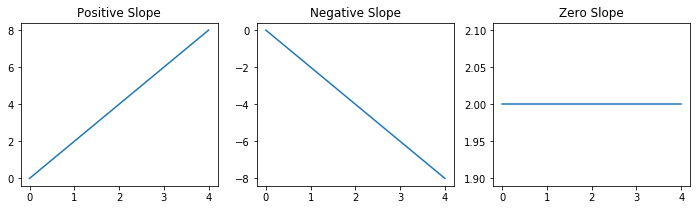

In [71]:
x = np.arange(5)
fig = plt.figure(figsize=(12,3))
axarr = fig.subplots(1,3)

axarr[0].plot(x, x*2)
axarr[0].set_title("Positive Slope")
axarr[1].plot(x, x*-2)
axarr[1].set_title("Negative Slope")
axarr[2].plot(x, x*0 + 2)
axarr[2].set_title("Zero Slope")
plt.show();

### Linear Diffrentiation

Consider this situation where you are driving at a constant speed of 10 $km/h$.

We can represent this in a mathematical way with a simple function that looks like this:

$Distance = 10 \times Time$

Or to make it more abstract we can call $Distance$ $y$ because it will be represented on the Y axis and call $Time$ $x$ because it will be represented on the X axis. So our function for this relationship will look like this:

$y = 10x$

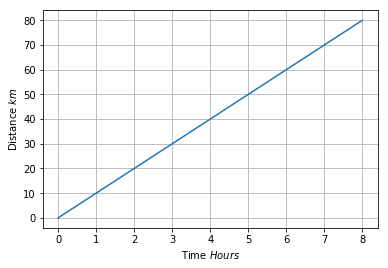

In [36]:
speed = 10
time = np.arange(0,9)
distance = speed * time

plt.xlabel("Time $Hours$")
plt.ylabel("Distance $km$")
plt.grid()
plt.plot(time, distance);

After 1 hour you have travelled 10 $km$ and after 4 hours would have travelled 40 $km$. This realtionship is called linear because it can be represented by a straight line. With linear relationships we can measure the slope using any two points $(x_1,y_1)$ and $(x_2,y_2)$. If we get these two points are 1 hour and 4 hours we get these two points $(1,10)$ and $(4,40)$. To measure the slope (represented by the letter $m$) now we use this function:

$$m = \frac{y_2 - y_1}{x_2 - x_1}$$

If we substitute our points we can measure the slope.

$$m = \frac{40 - 10}{4 - 1} = \frac{30}{3} = 10$$

There is nothing interesting about this finding! We already knew the speed was 10 $km/h$. This is a linear function and most of calculus is more interested in non-linear functions. So let's see how does that work.

### Polynomial Diffrentiation

Consider a situation where you are not travelling at constant speed but perhapse your speed in increasing over time. So in the begenning you are starting at a low speed and over time your speed increases. We call this acceleration and it is measured in $m/s^2$ but for a unit that we can relate to I'll use $km/h^2$. Let's illustrate this and it would make more sense.

We can represent this in a mathematical way with a simple function that looks like this:

$Distance = Acceleration * Time^2$

Again to abstract this function we can write it like this:

$y = ax^2$

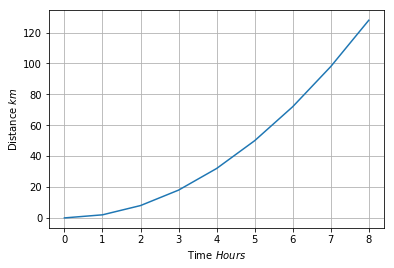

In [38]:
acceleration = 2
time = np.arange(0,9)
distance = acceleration * time**2

plt.xlabel("Time $Hours$")
plt.ylabel("Distance $km$")
plt.grid()
plt.plot(time, distance);

First, let's look at the distance over time.

In [35]:
distance

array([  0,   2,   8,  18,  32,  50,  72,  98, 128])

We can notice that we travelled 2 $km$ in the first hour and 8 $km$ after two hours making the distance we travelled for the second hour 6 $km$. This means our speed is changing over time. To measure the slope for this, we will need to specify at what time do we want the speed because it is changing over time.

To get the slope we derive another function that measure the slope of this function. This function is called __derevative__ and has the notation $f'$ or $\frac{dy}{dx}$

There is no standard mthematical way to come up with the the derevative function. It depends of the function type. Let's look a polipomial function and see how to get the derevative of that function:

$f(x) = ax^n$

to detive a polinomial function we use this rule:

$f'(x)=n \times ax^{n-1}$

to apply this to our function from before:

$y = 2x^2$

$y' = 2 \times 2x^{2-1} = 4x$

to to get the speed at any point in time, we can use the derevative function. So the speed after 3 hours is:

$y' = 4 \times 3 = 12$

Now let's visualize both of these functions to see how does they ralate to each other.

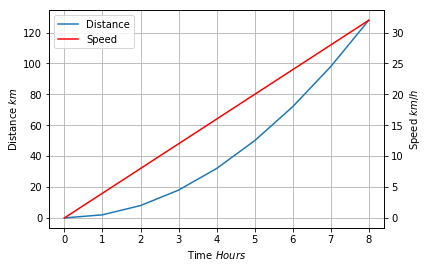

In [73]:
acceleration = 2
time = np.arange(0,9)
distance = acceleration * time**2
speed = 4 * time

plt.xlabel("Time $Hours$")
plt.ylabel("Distance $km$")
plt.grid()
l1 = plt.plot(time, distance, label="Distance")
plt.twinx()
plt.ylabel("Speed $km/h$")
l2 = plt.plot(time, speed, "r", label="Speed")
plt.legend(l1+l2, ("Distance", "Speed"));

Since you know the rule now, let's try to apply it to out first example

$y = 10x = 10x^1$

$y' = 1 \times 10x^{1-1} = 10x^0 = 10 \times 1 = 10$

Anything to the power 0 is equal to 1. It might be weird, but that's just math!

### Complex Ploynominal Functions

The same rule applies for any polynominal function. Let's try some examples:

$f(x) = 2x^2 + 4x + 10$

$f'(x) = 2 \times 2x^{2-1} + 1 \times 4x{1-1} + 0 = 4x + 4$

Notice that we can apply the rule to each part of the function seperatly. Any part of the functiona that's not muliplied by x will give you a derevative of 0.

### Trigonometry

Derevatives of trigonometric functions can be derived to some level straight forward out of a lookup table. This is an incomlete table of functions and their derevatives:

| Function $f(x)$ | Deravative  $f'(x)$|
| --------------- | ------------------ |
| $sin(x)$        | $cos(x)$           |
| $cos(x)$        | $-sin(x)$          |
| $tan(x)$        | $sec^2(x)$         |
| $cot(x)$        | $-csc^2(x)$        |
| $sec(x)$        | $sec(x)tan(x)$     |
| $csc(x)$        | $-csc(x)cost(x)$   |

You don't have to memorize this. This is available everywhere!

Just for fun let's visualize one of them as see if it makes sense.

$f(x) = sin(x)$

$f'(x) = cos(x)$

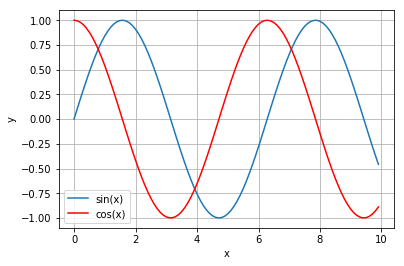

In [57]:
x = np.arange(0,10, 0.1)
sin_x = np.sin(x)
cos_x = np.cos(x)

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.plot(x, sin_x, label="sin(x)")
plt.plot(x, cos_x, "r", label="cos(x)")
plt.legend();

## Next

Did I get existed about calculus yet? well you will love the next part where we get into some more interesting derevativesa dn a more intuative understanding of why do we need that whole derevative in the first place.

<center>This work in <b>open sourced</b> and licensed under GNU General Public License v2.0<br />

Copyright © 2018 Abdullah Alrasheed and other contributes<br /><br />Roshan Logo is not open sourced and is not covered by the GNU license</center>